In [1]:
# main packages
import numpy as np
import pandas as pd
import tensorflow as ts
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('merc.csv')
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


In [3]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [4]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

D:\programs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

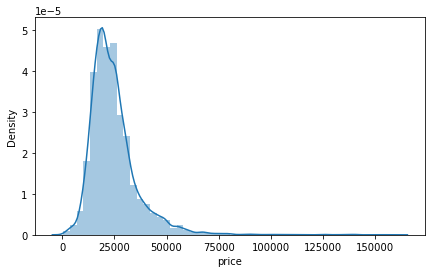

In [5]:
plt.figure(figsize=(7,4))
sns.distplot(data['price'])

D:\programs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

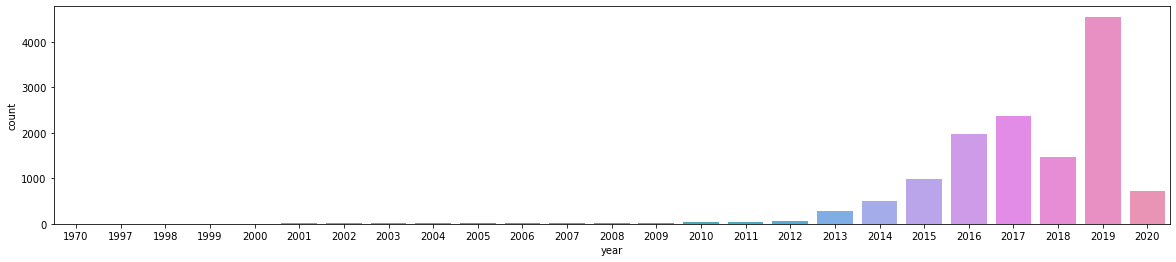

In [6]:
plt.figure(figsize=(20,4))
sns.countplot(data['year'])

In [7]:
data.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [8]:
data.corr()['price']

year          0.520712
price         1.000000
mileage      -0.537214
tax           0.268717
mpg          -0.438445
engineSize    0.516126
Name: price, dtype: float64

<AxesSubplot:xlabel='mileage', ylabel='price'>

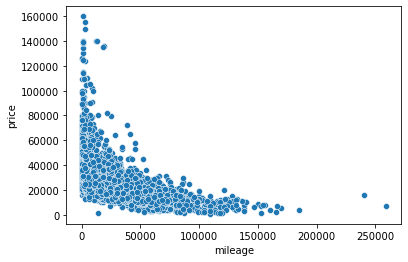

In [9]:
sns.scatterplot(x=data['mileage'],y=data['price'],data=data)

In [10]:
data.sort_values('price',ascending=False).head(20)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6199,G Class,2020,159999,Semi-Auto,1350,Petrol,145,21.4,4.0
10044,G Class,2020,154998,Automatic,3000,Petrol,150,21.4,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2
8737,A Class,2019,140319,Semi-Auto,785,Petrol,150,22.1,4.0
6386,G Class,2018,139995,Semi-Auto,13046,Petrol,145,21.4,4.0
8,G Class,2019,139948,Automatic,12000,Petrol,145,21.4,4.0
9133,A Class,2019,139559,Semi-Auto,1000,Petrol,145,22.1,4.0
8821,A Class,2020,138439,Semi-Auto,1000,Petrol,145,22.1,4.0
5902,G Class,2018,135771,Semi-Auto,19000,Petrol,145,21.4,4.0
7864,G Class,2018,135124,Semi-Auto,18234,Petrol,150,21.4,4.0


In [52]:
data_price_modified = data.sort_values('price',ascending=False).iloc[131:]
data_price_modified = data_price_modified.drop('transmission',axis=1)
data_price_modified = data_price_modified.drop('fuelType',axis=1)
data_price_modified = data_price_modified.drop('model',axis=1)

In [53]:
data_price_modified.head()

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0


D:\programs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

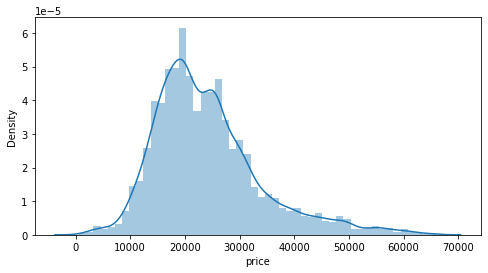

In [54]:
plt.figure(figsize=(8,4))
sns.distplot(data_price_modified['price'])

<AxesSubplot:xlabel='year', ylabel='price'>

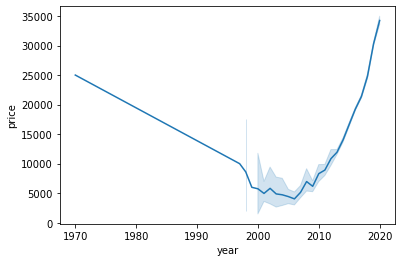

In [55]:
sns.lineplot(x=data_price_modified['year'],y=data_price_modified['price'],
             data=data_price_modified)

In [56]:
#data_price_modified = data_price_modified.drop('transmission',axis=1)
data_price_modified = data_price_modified[data_price_modified.year != 1970]

In [57]:
data_price_modified.sort_values('year').head()

,year,price,mileage,tax,mpg,engineSize
11912,1997,9995,76000,255,28.2,3.2
11860,1998,10450,49000,255,28.2,3.2
11808,1998,1990,113557,265,32.1,2.3
11764,1998,1990,99300,265,32.1,2.3
11794,1998,19990,43534,265,23.3,6.0


In [58]:
# model 
Y = data_price_modified['price'].values
X = data_price_modified.drop('price',axis=1).values

In [59]:
Y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)

In [119]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(12,activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [121]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),batch_size=250,epochs=300)

Epoch 1/300
37/37 [==============================] - 1s 6ms/step - loss: 672141440.0000 - val_loss: 688094912.0000
Epoch 2/300
37/37 [==============================] - 0s 3ms/step - loss: 672104960.0000 - val_loss: 688023680.0000
Epoch 3/300
37/37 [==============================] - 0s 3ms/step - loss: 671924544.0000 - val_loss: 687611008.0000
Epoch 4/300
37/37 [==============================] - 0s 3ms/step - loss: 670903616.0000 - val_loss: 685406528.0000
Epoch 5/300
37/37 [==============================] - 0s 3ms/step - loss: 666197824.0000 - val_loss: 676352000.0000
Epoch 6/300
37/37 [==============================] - 0s 3ms/step - loss: 649527168.0000 - val_loss: 647216000.0000
Epoch 7/300
37/37 [==============================] - 0s 3ms/step - loss: 601663360.0000 - val_loss: 570816192.0000
Epoch 8/300
37/37 [==============================] - 0s 3ms/step - loss: 492473344.0000 - val_loss: 417302080.0000
Epoch 9/300
37/37 [==============================] - 0s 3ms/step - loss: 3116631

Epoch 73/300
37/37 [==============================] - 0s 3ms/step - loss: 32904050.0000 - val_loss: 33535166.0000
Epoch 74/300
37/37 [==============================] - 0s 3ms/step - loss: 32002310.0000 - val_loss: 32812906.0000
Epoch 75/300
37/37 [==============================] - 0s 3ms/step - loss: 31179470.0000 - val_loss: 32818606.0000
Epoch 76/300
37/37 [==============================] - 0s 3ms/step - loss: 30440502.0000 - val_loss: 32674834.0000
Epoch 77/300
37/37 [==============================] - 0s 3ms/step - loss: 29739206.0000 - val_loss: 31897462.0000
Epoch 78/300
37/37 [==============================] - 0s 3ms/step - loss: 29113140.0000 - val_loss: 31483328.0000
Epoch 79/300
37/37 [==============================] - 0s 3ms/step - loss: 28520614.0000 - val_loss: 31380446.0000
Epoch 80/300
37/37 [==============================] - 0s 3ms/step - loss: 27971854.0000 - val_loss: 30991130.0000
Epoch 81/300
37/37 [==============================] - 0s 3ms/step - loss: 27376640.0000 

37/37 [==============================] - 0s 3ms/step - loss: 19927966.0000 - val_loss: 24205176.0000
Epoch 145/300
37/37 [==============================] - 0s 3ms/step - loss: 19901132.0000 - val_loss: 24213094.0000
Epoch 146/300
37/37 [==============================] - 0s 3ms/step - loss: 19914706.0000 - val_loss: 23884724.0000
Epoch 147/300
37/37 [==============================] - 0s 3ms/step - loss: 19853860.0000 - val_loss: 24070086.0000
Epoch 148/300
37/37 [==============================] - 0s 4ms/step - loss: 19844360.0000 - val_loss: 23818736.0000
Epoch 149/300
37/37 [==============================] - 0s 3ms/step - loss: 19793262.0000 - val_loss: 24878512.0000
Epoch 150/300
37/37 [==============================] - 0s 3ms/step - loss: 19834116.0000 - val_loss: 24802058.0000
Epoch 151/300
37/37 [==============================] - 0s 3ms/step - loss: 19797848.0000 - val_loss: 23602164.0000
Epoch 152/300
37/37 [==============================] - 0s 3ms/step - loss: 19781500.0000 - val

37/37 [==============================] - 0s 4ms/step - loss: 18917330.0000 - val_loss: 22876986.0000
Epoch 216/300
37/37 [==============================] - 0s 4ms/step - loss: 18981332.0000 - val_loss: 22070214.0000
Epoch 217/300
37/37 [==============================] - 0s 3ms/step - loss: 18892704.0000 - val_loss: 23062422.0000
Epoch 218/300
37/37 [==============================] - 0s 3ms/step - loss: 18891160.0000 - val_loss: 22847486.0000
Epoch 219/300
37/37 [==============================] - 0s 3ms/step - loss: 18902086.0000 - val_loss: 22853186.0000
Epoch 220/300
37/37 [==============================] - 0s 3ms/step - loss: 18903770.0000 - val_loss: 22603378.0000
Epoch 221/300
37/37 [==============================] - 0s 3ms/step - loss: 18964938.0000 - val_loss: 22691926.0000
Epoch 222/300
37/37 [==============================] - 0s 3ms/step - loss: 18858106.0000 - val_loss: 22384084.0000
Epoch 223/300
37/37 [==============================] - 0s 3ms/step - loss: 18878488.0000 - val

37/37 [==============================] - 0s 3ms/step - loss: 18615536.0000 - val_loss: 21398686.0000
Epoch 287/300
37/37 [==============================] - 0s 3ms/step - loss: 18620790.0000 - val_loss: 21733948.0000
Epoch 288/300
37/37 [==============================] - 0s 3ms/step - loss: 18662730.0000 - val_loss: 21347230.0000
Epoch 289/300
37/37 [==============================] - 0s 3ms/step - loss: 18615708.0000 - val_loss: 22187642.0000
Epoch 290/300
37/37 [==============================] - 0s 3ms/step - loss: 18635582.0000 - val_loss: 22123118.0000
Epoch 291/300
37/37 [==============================] - 0s 3ms/step - loss: 18631838.0000 - val_loss: 22594672.0000
Epoch 292/300
37/37 [==============================] - 0s 3ms/step - loss: 18670902.0000 - val_loss: 21841932.0000
Epoch 293/300
37/37 [==============================] - 0s 3ms/step - loss: 18615164.0000 - val_loss: 21863878.0000
Epoch 294/300
37/37 [==============================] - 0s 3ms/step - loss: 18613298.0000 - val

In [122]:
loss_val_data = pd.DataFrame(model.history.history)

In [123]:
loss_val_data.head()

,loss,val_loss
0,672141440.0,688094912.0
1,672104960.0,688023680.0
2,671924544.0,687611008.0
3,670903616.0,685406528.0
4,666197824.0,676352000.0


<AxesSubplot:>

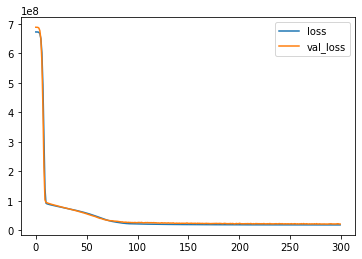

In [124]:
loss_val_data.plot()

In [125]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

predict_arr = model.predict(X_test)

mean_absolute_error(Y_test,predict_arr)

3263.8766470564797

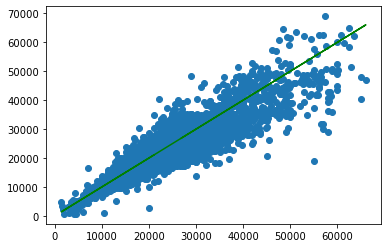

In [126]:
plt.scatter(Y_test,predict_arr) 
plt.plot(Y_test,Y_test,'g-')

In [127]:
test_car = data_price_modified.drop('price',axis=1).iloc[2]
test_car = scaler.transform(test_car.values.reshape(-1,5))
data_price_modified.iloc[2]
model.predict(test_car)

array([[21105204.]], dtype=float32)